## **Imports** 

In [22]:
import numpy as np 
import Markovitz_reductionV1
import Markovitz_reductionV2
import results_annalysis

# **Testing the Projections**

In [23]:
def Projection(j,n,fraction): 
    P = np.zeros(((fraction-1),n*(fraction - 1 )))
    for i in range((fraction - 1)): 
        P[i,j*(fraction - 1)+i] = 1
    return P 

print(Projection(3,4,4))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## **Markovitz energie** 

We will test with 3 assets to verify the reduction 

Defining the expected return vector and the covaraiance matrix (only an example )

In [24]:


# Expected returns
mu_A = 0.08
mu_B = 0.12
mu_C = 0.10
# Covariances
sigma_AA = 0.0004;sigma_AB = 0.0003;sigma_AC = 0.0002;sigma_BA = 0.0003;sigma_BB = 0.0005
sigma_BC = 0.0004;sigma_CA = 0.0002;sigma_CB = 0.0004;sigma_CC = 0.0006
# Expected return vector
expected_return_vector = np.array([mu_A, mu_B, mu_C])
Mu = expected_return_vector

# Covariance matrix
covariance_matrix = np.array([[sigma_AA, sigma_AB, sigma_AC],
                              [sigma_BA, sigma_BB, sigma_BC],
                              [sigma_CA, sigma_CB, sigma_CC]])
V = covariance_matrix



Defining the optimizing parameters

In [25]:
Lamda1 = 1
Lamda2 = 1
Lamda  = [0.5,0.5,0.5]
fraction = 200
step = 0.05
iteration = 1000
n_cond_init = 50

def temperature(self, t):
    tau = iteration/1
    # temp = 10*(1-np.exp(-1/tau*(t-1)))
    temp = 0.1*np.log(100*t)
    return 0.05
    # r = np.random.randint(0, 2)*2-1
    # return temp

def a(self, t):
    a0=0
    return t/iteration/5
    # if t<100:
    #     return 0.01*t
    # else:
    #     return 1

def step_func(self, t):
    # return 1.01-np.exp(-0.01*(t-1))
    # return 1/t
    return step

**The Markovitz problem**

In [26]:
markovitz = Markovitz_reductionV2.Markovitz(fraction,V, Mu, Lamda1, Lamda2,Lamda, step_func, iteration, n_cond_init,temperature,a)

**Energies**

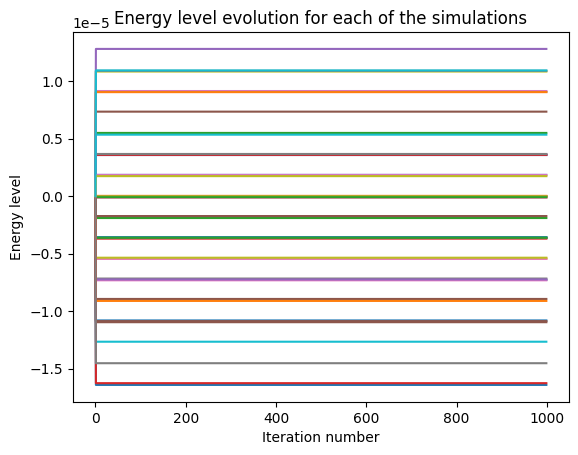

-1.6421698959675268e-05

In [27]:
states,energies = markovitz.SB_optimization(step_func, iteration, n_cond_init,temperature,a)
results_annalysis.plot_energies_evolution(energies)
results_annalysis.extract_full_solution(states, energies)[0]

In [28]:
print(np.shape(states))

(50, 60, 1000, 2)


In [29]:
def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    # pp = np.array([2**i for i in range(bits)])
    pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

In [30]:
# import matplotlib.pyplot as plt 
# Energies = markovitz.energies(states)
# for i in range(n_cond_init): 
#     plt.plot(np.array(list(range(iteration))), Energies[i,:])

# plt.xlabel('Time Step')
# plt.ylabel('energies')
# plt.show()

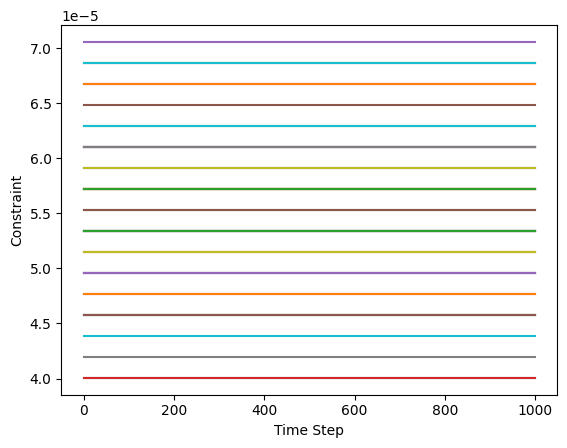

In [31]:
# Evolution of the constraint that P (SF+I)/2 = 1 
import matplotlib.pyplot as plt 
Sum = np.zeros((n_cond_init,iteration))
for t in range(iteration): 
    S = states[:,:,t,0]
    SF= np.zeros(np.shape(S))
    SF[states[:, :, t, 0] >= 0] = 1
    SF[states[:, :, t, 0] < 0] = -1
    I = np.ones(np.shape(SF))
    Weights = np.dot(Pbinaire(fraction,3),(SF+I).T)
    Sum[:,t] = np.sum(Weights,axis = 0 )

# print(np.sum(Weights,axis = 0))
# print(Sum)
for i in range(n_cond_init): 
    plt.plot(np.array(list(range(iteration))), Sum[i,:])

plt.xlabel('Time Step')
plt.ylabel('Constraint')
plt.show()
        

In [32]:

print(states[Sum[:,-1]==1,:,-1,0])

[]


In [33]:
print(states[0,:,-1,0])#[condition intial, particule,temps,[position,speed]]

[ 0.98504561 -1.         -1.          0.98504561 -1.          0.98504561
 -1.          0.98504561 -1.          0.98504561 -1.         -1.
 -1.          0.98504561 -1.          0.98504561  0.98504561 -1.
  0.98504561 -1.          0.98535714 -1.         -1.         -1.
 -1.         -1.         -1.          0.98535714  0.98535714 -1.
  0.98535714  0.98535714  0.98535714 -1.          0.98535714  0.98535714
  0.98535714  0.98535714 -1.          0.98535714 -1.         -1.
 -1.          0.98520144 -1.         -1.         -1.         -1.
  0.98520144  0.98520144 -1.         -1.          0.98520144  0.98520144
 -1.          0.98520144 -1.         -1.         -1.         -1.        ]


In [34]:
S = states[40,:,-1,0]

SF= np.zeros(len(S))
for i in range(len(S)): 
    if S[i]>=0: 
        SF[i] = 1
    else: 
        SF[i] = -1

print(SF)
def P(fraction,n): 
    p = np.zeros((n,n*(fraction-1)))
    pp = np.array([i+1 for i in range(fraction -1 )])
    for i in range(n):
        start = i*(fraction-1)
        p[i,start:start+len(pp)] = pp
    return p/fraction

def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    # pp = np.array([2**i for i in range(bits)])
    pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

I = np.ones(len(S))
Choices = (SF+I)/2
Weights = np.dot(Pbinaire(fraction,3),Choices)
print(Weights)

[-1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1. -1. -1.]
[3.81469727e-06 9.53674316e-06 6.67572021e-06]


 **Seeing the weights**

In [35]:

# H,J = markovitz.Reduction_to_Ising()
Weights = markovitz.Ising_to_Portfolio(step_func, iteration, n_cond_init,temperature,a)

In [36]:
print(Weights)

[8.51889158e-06 9.46692065e-06 1.51458839e-05]


In [37]:
import numpy as np

A = np.zeros((6, 6))
p = Pbinaire(2,3)
for i in range(6):
    for j in range(6):
        A[i, j] = np.sum(p[:, i] * p[:, j])

# Now, A contains the result of the vectorized computation.

# Check if A is equal to p.T @ p
result = np.allclose(A, p.T @ p)
print(result)


True


## **SB with gradient**

In [38]:
markovitz = Markovitz_reductionV1.Markovitz(fraction,V, Mu, Lamda1, Lamda2,Lamda, step_func, iteration, n_cond_init,temperature,a)


In [39]:
states = markovitz.SB_optimization(step_func, iteration, n_cond_init,temperature,a)


In [40]:
def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    # pp = np.array([2**i for i in range(bits)])
    pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

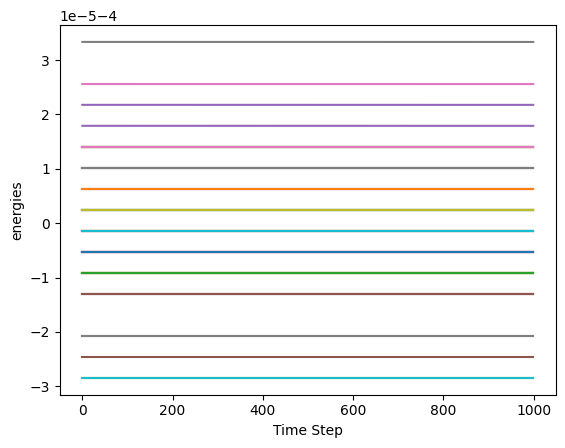

In [41]:
import matplotlib.pyplot as plt 
Energies = markovitz.energies(states)
for i in range(n_cond_init): 
    plt.plot(np.array(list(range(iteration))), Energies[i,:])

plt.xlabel('Time Step')
plt.ylabel('energies')
plt.show()

In [42]:
S = states[40,:,-1,0]

SF= np.zeros(len(S))
for i in range(len(S)): 
    if S[i]>=0: 
        SF[i] = 1
    else: 
        SF[i] = -1

print(SF)
def P(fraction,n): 
    p = np.zeros((n,n*(fraction-1)))
    pp = np.array([i+1 for i in range(fraction -1 )])
    for i in range(n):
        start = i*(fraction-1)
        p[i,start:start+len(pp)] = pp
    return p/fraction

def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    # pp = np.array([2**i for i in range(bits)])
    pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

I = np.ones(len(S))
Choices = (SF+I)/2
Weights = np.dot(Pbinaire(fraction,3),Choices)
print(Weights)

[-1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1.]
[9.53674316e-06 9.53674316e-06 1.04904175e-05]
